# Car Price Prediction

### Objective 
<p>To build suitable Machine Learning Model for Car Price Prediction on the bellow data set.</p>

<h1>Table of contents</h1>

1. [Importing Libraries and Dataset](#1)<br>
2. [Exploratory Data Analysis](#2)<br>
3. [Feature Engineering](#3)<br>
4. [Data Vizualization](#4)<br>
5. [Model Building](#5)<br>
6. [Model Evaluation](#6)<br>
7. [Generating pickle](#7)<br>
<hr>

<h2>Importing Libraries and Dataset</h2><a id="1"></a>

In [27]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
year_list=[]
car_name_list=[]
km_list=[]
model_list=[]
owner_list=[]
car_type_list=[]
price_list=[]
loc = ['delhi-ncr','bengaluru','chennai','mumbai','pune','hyderabad','kolkata','ahmedabad','chandigarh','jaipur']
# loc = ['delhi-ncr']

for loc in loc:
    # print loc
    car = ['hyundai','renault','mahindra','toyota','audi','honda','maruti','tata','ford','skoda' ]

    for car in car:

        # print car
        url = ('https://www.cars24.com/buy-used-{0}-cars-{1}/').format(car,loc)
#         print url

# url = 'https://www.cars24.com/buy-used-hyundai-cars-delhi-ncr/'
        r = requests.get(url)
        htmlc = r.content
        soup = BeautifulSoup(htmlc, 'html.parser')
        carname = soup.find_all('h2', class_='_3FpCg')
        carmodel = soup.find_all('p', class_='cvakB')
        carowner = soup.find_all('ul', class_='bVR0c')
        price = soup.find_all('div', class_='_7udZZ')
        

        # car name
        c = 0
        
        for name in carname:
            c = c + 1
            year = name.get_text()[:4]
            year_list.append(year)


        
        for name in carname:
            c_name = name.get_text()[5:]
            car_name_list.append(c_name)
            # print c_name
        # #
        # # car model name
        
        for model in carmodel:
            model = model.get_text()[:-6]
            model_list.append(model)
        # #
        # # car owner
        
        
        for model in carowner:
            km = model.find('li')
            # km_list.append(km)

            kms = model.get_text()[:9]
            km_list.append(kms)# km
            # print kms
            oewen = model.get_text()[9:18]
            owner_list.append(oewen)

            c_type = model.get_text()[18:]
            car_type_list.append(c_type)
        # print km_list
        # print owner_list
#         print car_type_list
        # # exit()
        #     # print c_type
        #     # owner_type = (model.select_one("ul li:nth-of-type(2)").text)  # owner type
        #     # owner_list.append(owner_type)
        #     # car_type = (model.select_one("ul li:nth-of-type(3)").text)  # petrol/diesel
        #     # car_type_list.append(car_type)
        
        for model in price:
            price = model.get_text()
            price_list.append(price)
        
        
#         filename = "university_record1.csv"
#         row = []
#         for i in range(len(name)):
#         tmp = []
#         tmp.append(name[i])
#         tmp.append(branch[i])
#         tmp.append(year[i])
#         row.append(tmp)
        
        # for i in range(c):
        #     # print i
df = pd.DataFrame({'year': year_list, 'carname': car_name_list, 'kms': km_list, "owner_type": owner_list, "car_type": car_type_list, 'price': price_list})
df.to_csv("carsdataa.csv",index=False)
# print(df)
        
        

In [28]:
Train = pd.read_csv('carsdataa.csv')
Train            

,year,carname,kms,owner_type,car_type,price
0,2013,Hyundai Eon,"11,989 km",1st Owner,PetrolUP-32,"₹2,09,899"
1,2014,Hyundai i10,"35,317 km",2nd Owner,PetrolDL-3C,"₹3,01,299"
2,2022,Hyundai VENUE,"9,463 km1",st OwnerP,etrolUP-14,"₹9,68,199"
3,2021,Hyundai NEW I20,"5,992 km1",st OwnerP,etrolDL-7C,"₹10,59,099"
4,2021,Hyundai NEW I20,"2,806 km1",st OwnerP,etrolUP-14,"₹7,56,599"
...,...,...,...,...,...,...
1342,2016,Ford Ecosport,"1,07,588",km1st Own,erDieselRJ-32,"₹5,80,099"
1343,2020,Ford Ecosport,"7,280 km1",st OwnerP,etrolRJ-45,"₹9,29,299"
1344,2018,Ford Ecosport,"74,355 km",1st Owner,DieselRJ-23,"₹7,58,999"
1345,2018,Skoda Rapid,"28,490 km",1st Owner,PetrolRJ-45,"₹6,55,199"


<h2>Exploratory Data Analysis</h2><a id="2"></a>

In [29]:
print('The size of Dataframe is: ', df.shape)
print('\n')
df.info()

The size of Dataframe is:  (1347, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        1347 non-null   object
 1   carname     1347 non-null   object
 2   kms         1347 non-null   object
 3   owner_type  1347 non-null   object
 4   car_type    1347 non-null   object
 5   price       1347 non-null   object
dtypes: object(6)
memory usage: 63.3+ KB


- 'Selling_Price' is our Target variable.

In [30]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and 
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [35]:
missing_data(data= df)

,Total,Percent
year,0,0.0
carname,0,0.0
kms,0,0.0
owner_type,0,0.0
car_type,0,0.0
price,0,0.0


As from above dataframe, my observation on missing data are: 
<UL>
   <li>There is no missing values in our dataset.
   <li>Therefore there is no need of data cleaning.
</UL>

In [37]:
print("'Fuel_Type' variable have {} unique category : {}\n".format(df['car_type'].nunique(), df['car_type'].unique()))
print("'Seller_Type' variable have {} unique category : {}\n".format(df['carname'].nunique(), \
                                                                     df['carname'].unique()))
print("'Transmission' variable have {} unique category : {}\n".format(df['price'].nunique(), \
                                                                    df['price'].unique()))
print("'Owner' variable have {} unique category : {}".format(df['owner_type	'].nunique(), df['owner_type	'].unique()))

'Fuel_Type' variable have 415 unique category : ['PetrolUP-32' 'PetrolDL-3C' 'etrolUP-14' 'etrolDL-7C' 'PetrolDL-2C'
 'PetrolDL-7C' 'etrolDL-10' 'PetrolDL-9C' 'PetrolDL-8C' 'PetrolDL-5C'
 'PetrolDL-4C' 'PetrolDL-11' 'Petrol + CNGDL-3C' 'PetrolDL-12'
 'PetrolHR-26' 'etrolDL-12' 'etrolDL-9C' 'etrolDL-3C' 'etrolDL-8C'
 'PetrolUP-21' 'PetrolUP-15' 'PetrolHR-29' 'PetrolHR-51'
 'Petrol + CNGHR-02' 'DieselDL-10' 'DieselDL-8C' 'DieselDL-12'
 'DieselUP-16' 'DieselHR-51' 'DieselDL-14' 'PetrolDL-1C' 'PetrolDL-10'
 'PetrolDL-14' 'DieselDL-1C' 'DieselDL-2C' 'DieselUP-14' 'DieselHR-26'
 'DieselHR-30' 'PetrolUP-14' 'etrolDL-6C' 'PetrolHR-98' 'PetrolHR-16'
 'PetrolHR-27' 'PetrolDL-6C' 'PetrolUP-16' 'etrolUP-16' 'etrolHR-26'
 'etrolDL-11' 'etrolHR-11' 'etrolDL-5C' 'Petrol + CNGHR-51' 'PetrolHR-06'
 'ieselUP-16' 'DieselUP-15' 'PetrolKA-41' 'PetrolKA-51' 'PetrolKA-03'
 'etrolKA-02' 'PetrolKA-01' 'PetrolKA-11' 'PetrolKA-53' 'PetrolKA-05'
 'PetrolKA-08' 'etrolKA-51' 'PetrolKA-46' 'PetrolKA-02' 'DieselKA-51

KeyError: 'owner_type\t'

In [39]:
df['owner_type'].replace(to_replace=3, value=2, inplace= True)
print("'Owner' variable have {} unique category : {}".format(df['owner_type'].nunique(), df['owner_type'].unique()))

'Owner' variable have 13 unique category : ['1st Owner' '2nd Owner' 'st OwnerP' '3rd Owner' 'nd OwnerP' 'st OwnerD'
 'km1st Own' ' OwnerPet' 'nd OwnerD' ' OwnerDie' 'km2nd Own' 'km3rd Own'
 '4th Owner']


In [8]:
# Descriptive statistical summary of numerical features
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.039867
std,2.891554,5.082812,8.644115,38886.883882,0.212302
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000


In [9]:
# Descriptive statistical summary of categorical features
df.describe(include= 'object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


<h3>Feature Engineering</h3><a id="3"></a>
Here, I'll derive new feature from feature 'Year'.

In [40]:
# Let's see all column names
df.columns

Index(['year', 'carname', 'kms', 'owner_type', 'car_type', 'price'], dtype='object')

Here, I'll derive new feature from 'Year' to calculate how many year old the car is.

In [43]:
# Let's create a new variable 'Current_Year'
df['current_year'] = 2020

# To Calculate how old the car is, I created new feature "No_of_Years"
df['No_of_Years'] = df['current_year'] - df['year']

df.head()

,year,carname,kms,owner_type,car_type,price,No_of_Years,current_year
0,2020,Hyundai Eon,"11,989 km",1st Owner,PetrolUP-32,"₹2,09,899",0,2020
1,2020,Hyundai i10,"35,317 km",2nd Owner,PetrolDL-3C,"₹3,01,299",0,2020
2,2020,Hyundai VENUE,"9,463 km1",st OwnerP,etrolUP-14,"₹9,68,199",0,2020
3,2020,Hyundai NEW I20,"5,992 km1",st OwnerP,etrolDL-7C,"₹10,59,099",0,2020
4,2020,Hyundai NEW I20,"2,806 km1",st OwnerP,etrolUP-14,"₹7,56,599",0,2020


#### Remove features

In [45]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['carname','year', 'current_year'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()

,kms,owner_type,car_type,price,No_of_Years
0,"11,989 km",1st Owner,PetrolUP-32,"₹2,09,899",0
1,"35,317 km",2nd Owner,PetrolDL-3C,"₹3,01,299",0
2,"9,463 km1",st OwnerP,etrolUP-14,"₹9,68,199",0
3,"5,992 km1",st OwnerP,etrolDL-7C,"₹10,59,099",0
4,"2,806 km1",st OwnerP,etrolUP-14,"₹7,56,599",0


<h2>Data Visualization</h2><a id="4"></a>

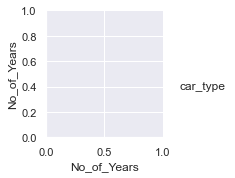

In [60]:
sns.pairplot(data= final_df, hue= 'car_type', diag_kind= 'kde')

ValueError: could not convert string to float: '₹2,09,899'

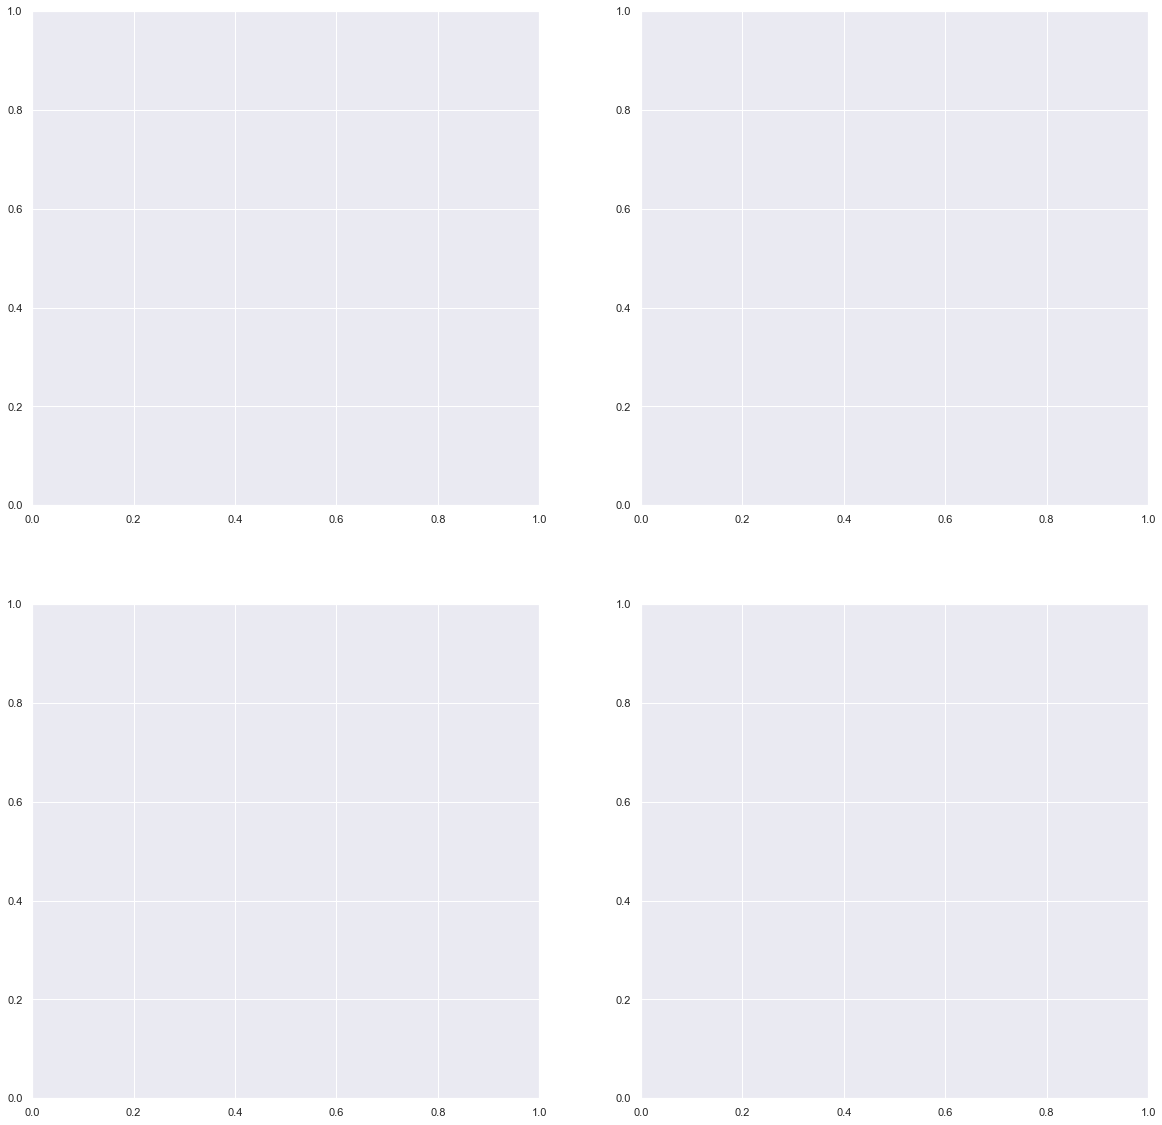

In [55]:

# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = final_df['price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of  Price', fontsize=16)
ax0.set(xlabel= ' Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Present_Price' feature
# k2 = sns.distplot(a = final_df['Present_Price'], bins= 25, ax=ax1) # add to subplot 2           
# ax1.set_title('Distribution of Present Price', fontsize=16)
# ax1.set(xlabel= 'Present Price', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = final_df['kms'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = final_df['No_of_Years'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Number of Years', fontsize=16)
ax3.set(xlabel= 'Number of Years', ylabel= 'Density')

plt.show()
#fig.savefig("Distributionplot.png")

In [63]:
print("'No_of_Years' variable have {} unique category : {}".format(final_df['No_of_Years'].nunique(), 
                                                                   final_df['No_of_Years'].unique()))

'No_of_Years' variable have 1 unique category : [0]


In [ ]:
cat_col = list(final_df.columns[3:7])

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i) 
    cat_order = final_df[cat_col[k]].value_counts()
    sns.countplot(data = final_df, x = cat_col[k], order = cat_order.index, ax= ax) 
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)
    
    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1

Text(0.5, 1.0, 'Number of Years Value Counts')

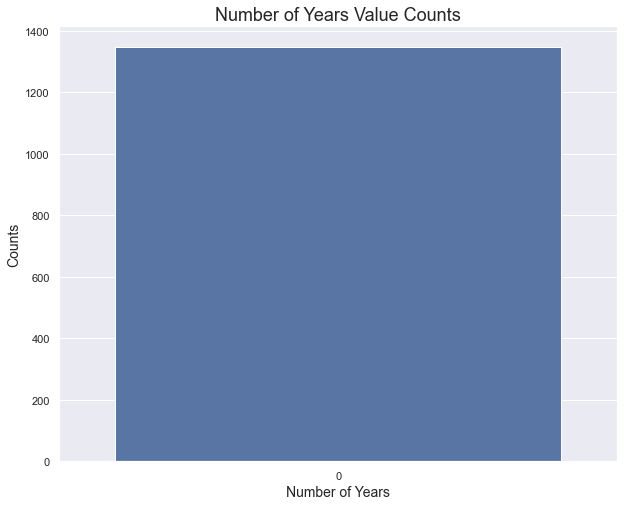

In [65]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)

### Convert Categorical variable into numerical
Here, I am using One Hot Encoding / get_dummies to convert categorical variables to numerical.

In [ ]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

In [ ]:
# Let's check data types of variables
final_df.dtypes

In [ ]:
# Converting the datatypes of variables as of required datatype
final_df['Fuel_Type_Diesel'] = final_df['Fuel_Type_Diesel'].astype('int64')
final_df['Fuel_Type_Petrol'] = final_df['Fuel_Type_Petrol'].astype('int64')
final_df['Seller_Type_Individual'] = final_df['Seller_Type_Individual'].astype('int64')
final_df['Transmission_Manual'] = final_df['Transmission_Manual'].astype('int64')

In [ ]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [ ]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

In [ ]:
print(model.feature_importances_)

In [ ]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

But in this project, we will use all features for prediction.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2>Model Building</h2><a id="5"></a>

In [ ]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))
    

In [ ]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

I have seen that Random Forest Regressor have minimum 'RMSE' and high accuracy. So, I decided to use Random Forest Regressor as Machine Learning Model. 

In [ ]:
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [ ]:
# Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

In [ ]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

In [ ]:
y_predictions = regressor_random.predict(X_test)
y_predictions

### Predicting Test Data by visualizing
*Now that I've fit and trained the model, I need to evaluate its performance by predicting the test values and visualize the results.*

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Price', fontsize=14)

### Residuals

*Next, I explore the residuals to make sure everything was okay with the data (i.e. it is Normally distributed).*

In [ ]:
sns.distplot(y_test - y_predictions)

<h2>Model Evaluation</h2><a id="6"></a>

In [ ]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

In [ ]:
print('Accuracy: ', r2_score(y_test, y_predictions))

<h3>Gerenate the pickle file</h3><a id="7"></a>

In [ ]:
import pickle

# open the file where you want to store
file = open('rf_regression_model.pkl', 'wb')

# dump information on that file
pickle.dump(regressor_random, file)